## plotting

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import numpy as np
import os
import xarray as xr
import xcdat as xc
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm as BM
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as mticker
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [31]:
from scipy import stats

In [32]:
from functions import preproc_funcs as funcs

In [33]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 12
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 2.0
# Tick properties
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'

In [159]:
import matplotlib as m
from matplotlib.colors import BoundaryNorm as BM
import matplotlib.patches as mpatches

def plot_background(ax, draw=True):
    ax.add_feature(cfeature.COASTLINE, alpha=0.9, lw=1.1)
    # ax.set_global()
    # ax.add_feature(cfeature.LAND, color='k', alpha=0.9, zorder=1)
    # ax.add_feature(cfeature.OCEAN, color='lightgray')
    gl = ax.gridlines(draw_labels=draw,
                      linewidth=1, color='gray', alpha=0.01, linestyle='--')
    gl.top_labels = False
    # gl.left_labels = False
    # gl.bottom_labels = False
    gl.right_labels = False
    gl.xlines = False
    # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    return ax


def plot_maps(x, y, z, titles, labels, cmap, levels, cbar_label = 'Precip', pval = [], draw_winds=False, u_wnd=[], v_wnd=[], wind_scale=20, nrows=1, ncols=3, figsize=(12,4), land_mask_list = [0], add_patch=False, cbar_orientation='vertical', hatch_type = 'insig', proj = ccrs.Robinson(central_longitude=160)):
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True, subplot_kw={'projection':proj})
    
    axlist = axarr.flatten()
    
    for ax in axlist:
        plot_background(ax)
    
    for i in range(len(z)):
        axlist[i].contourf(x, y, z[i], cmap = cmap, transform = ccrs.PlateCarree(central_longitude=0), levels=levels, extend='both')
        axlist[i].set_title(titles[i])
        if draw_winds:
            axlist[i].quiver(x[::5, ::5], y[::5, ::5], u_wnd[i].to_numpy()[::5, ::5], v_wnd[i].to_numpy()[::5, ::5], scale=wind_scale, color='tab:green', transform=ccrs.PlateCarree())
        if i in land_mask_list:
            axlist[i].add_feature(cfeature.LAND, color = 'k', zorder=1)
        if pval != []:
            if hatch_type == 'insig':
                pval_plot = np.ma.masked_not_equal(pval[i], 1)
            elif hatch_type == 'sig':
                pval_plot = np.ma.masked_not_equal(pval[i], 0)
            axlist[i].pcolor(x, y, pval_plot, alpha = 0., hatch='////', transform = ccrs.PlateCarree(central_longitude=0))
        axlist[i].set_title(titles[i], fontdict={'fontsize':12})
        axlist[i].text(0.1, 1.05, labels[i], size=16, fontweight='bold', transform=axlist[i].transAxes)
        if add_patch:
            axlist[i].add_patch(mpatches.Rectangle(xy=[120, -65], width=170, height=20,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
            axlist[i].add_patch(mpatches.Rectangle(xy=[190, -5], width=80, height=10,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
            axlist[i].add_patch(mpatches.Rectangle(xy=[140, -5], width=30, height=10,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
            axlist[i].add_patch(mpatches.Rectangle(xy=[250, -30], width=40, height=20,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
        
    norm = BM(levels, 256, extend='both')
    fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap=cmap), ax = axlist, \
                orientation = cbar_orientation, shrink=0.7, aspect = 20, pad = 0.05, label = cbar_label)

### load data

In [35]:
pr_cp_son = xr.open_dataset('./data/res/indiv_years/son/pr_cp.nc')
pr_ep_son = xr.open_dataset('./data/res/indiv_years/son/pr_ep.nc')
pr_neut_son = xr.open_dataset('./data/res/indiv_years/son/pr_neut.nc')

pr_cp_djf = xr.open_dataset('./data/res/indiv_years/djf/pr_cp.nc')
pr_ep_djf = xr.open_dataset('./data/res/indiv_years/djf/pr_ep.nc')
pr_neut_djf = xr.open_dataset('./data/res/indiv_years/djf/pr_neut.nc')

pr_cp_mam = xr.open_dataset('./data/res/indiv_years/mam/pr_cp.nc')
pr_ep_mam = xr.open_dataset('./data/res/indiv_years/mam/pr_ep.nc')
pr_neut_mam = xr.open_dataset('./data/res/indiv_years/mam/pr_neut.nc')

In [36]:
omega_cp_son = xr.open_dataset('./data/res/indiv_years/son/omega_cp.nc')
omega_ep_son = xr.open_dataset('./data/res/indiv_years/son/omega_ep.nc')
omega_neut_son = xr.open_dataset('./data/res/indiv_years/son/omega_neut.nc')

omega_cp_djf = xr.open_dataset('./data/res/indiv_years/djf/omega_cp.nc')
omega_ep_djf = xr.open_dataset('./data/res/indiv_years/djf/omega_ep.nc')
omega_neut_djf = xr.open_dataset('./data/res/indiv_years/djf/omega_neut.nc')

omega_cp_mam = xr.open_dataset('./data/res/indiv_years/mam/omega_cp.nc')
omega_ep_mam = xr.open_dataset('./data/res/indiv_years/mam/omega_ep.nc')
omega_neut_mam = xr.open_dataset('./data/res/indiv_years/mam/omega_neut.nc')

In [37]:
pres_cp_son = xr.open_dataset('./data/res/indiv_years/son/pres_cp.nc')
pres_ep_son = xr.open_dataset('./data/res/indiv_years/son/pres_ep.nc')
pres_neut_son = xr.open_dataset('./data/res/indiv_years/son/pres_neut.nc')

pres_cp_djf = xr.open_dataset('./data/res/indiv_years/djf/pres_cp.nc')
pres_ep_djf = xr.open_dataset('./data/res/indiv_years/djf/pres_ep.nc')
pres_neut_djf = xr.open_dataset('./data/res/indiv_years/djf/pres_neut.nc')

pres_cp_mam = xr.open_dataset('./data/res/indiv_years/mam/pres_cp.nc')
pres_ep_mam = xr.open_dataset('./data/res/indiv_years/mam/pres_ep.nc')
pres_neut_mam = xr.open_dataset('./data/res/indiv_years/mam/pres_neut.nc')

In [124]:
uwnd_cp_son = xr.open_dataset('./data/res/indiv_years/son/uwnd_cp.nc')
uwnd_ep_son = xr.open_dataset('./data/res/indiv_years/son/uwnd_ep.nc')

uwnd_cp_djf = xr.open_dataset('./data/res/indiv_years/djf/uwnd_cp.nc')
uwnd_ep_djf = xr.open_dataset('./data/res/indiv_years/djf/uwnd_ep.nc')

uwnd_cp_mam = xr.open_dataset('./data/res/indiv_years/mam/uwnd_cp.nc')
uwnd_ep_mam = xr.open_dataset('./data/res/indiv_years/mam/uwnd_ep.nc')

In [125]:
vwnd_cp_son = xr.open_dataset('./data/res/indiv_years/son/vwnd_cp.nc')
vwnd_ep_son = xr.open_dataset('./data/res/indiv_years/son/vwnd_ep.nc')

vwnd_cp_djf = xr.open_dataset('./data/res/indiv_years/djf/vwnd_cp.nc')
vwnd_ep_djf = xr.open_dataset('./data/res/indiv_years/djf/vwnd_ep.nc')

vwnd_cp_mam = xr.open_dataset('./data/res/indiv_years/mam/vwnd_cp.nc')
vwnd_ep_mam = xr.open_dataset('./data/res/indiv_years/mam/vwnd_ep.nc')

In [38]:
gz500_cp_son = xr.open_dataset('./data/res/indiv_years/son/gz500_cp.nc')
gz500_ep_son = xr.open_dataset('./data/res/indiv_years/son/gz500_ep.nc')
gz500_neut_son = xr.open_dataset('./data/res/indiv_years/son/gz500_neut.nc')

gz500_cp_djf = xr.open_dataset('./data/res/indiv_years/djf/gz500_cp.nc')
gz500_ep_djf = xr.open_dataset('./data/res/indiv_years/djf/gz500_ep.nc')
gz500_neut_djf = xr.open_dataset('./data/res/indiv_years/djf/gz500_neut.nc')

gz500_cp_mam = xr.open_dataset('./data/res/indiv_years/mam/gz500_cp.nc')
gz500_ep_mam = xr.open_dataset('./data/res/indiv_years/mam/gz500_ep.nc')
gz500_neut_mam = xr.open_dataset('./data/res/indiv_years/mam/gz500_neut.nc')

In [39]:
bstrap_pr_cp_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pr_cp_agreement_mask_son.nc')
bstrap_pr_ep_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pr_ep_agreement_mask_son.nc')

bstrap_pr_cp_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pr_cp_agreement_mask_djf.nc')
bstrap_pr_ep_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pr_ep_agreement_mask_djf.nc')

bstrap_pr_cp_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pr_cp_agreement_mask_mam.nc')
bstrap_pr_ep_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pr_ep_agreement_mask_mam.nc')

In [40]:
bstrap_omega_cp_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/omega_cp_agreement_mask_son.nc')
bstrap_omega_ep_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/omega_ep_agreement_mask_son.nc')

bstrap_omega_cp_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/omega_cp_agreement_mask_djf.nc')
bstrap_omega_ep_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/omega_ep_agreement_mask_djf.nc')

bstrap_omega_cp_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/omega_cp_agreement_mask_mam.nc')
bstrap_omega_ep_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/omega_ep_agreement_mask_mam.nc')

In [41]:
# bstrap_pres_cp_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pres_cp_agreement_mask_son.nc')
# bstrap_pres_ep_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pres_ep_agreement_mask_son.nc')

# bstrap_pres_cp_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pres_cp_agreement_mask_djf.nc')
# bstrap_pres_ep_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pres_ep_agreement_mask_djf.nc')

# bstrap_pres_cp_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pres_cp_agreement_mask_mam.nc')
# bstrap_pres_ep_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/pres_ep_agreement_mask_mam.nc')

In [42]:
# bstrap_gz500_cp_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/gz500_cp_agreement_mask_son.nc')
# bstrap_gz500_ep_son = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/gz500_ep_agreement_mask_son.nc')

# bstrap_gz500_cp_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/gz500_cp_agreement_mask_djf.nc')
# bstrap_gz500_ep_djf = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/gz500_ep_agreement_mask_djf.nc')

# bstrap_gz500_cp_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/gz500_cp_agreement_mask_mam.nc')
# bstrap_gz500_ep_mam = xr.open_dataset('./data/res/LN_diversity_bootstrap_masks/gz500_ep_agreement_mask_mam.nc')

In [187]:
plot_list = [
    pr_cp_son.prate.mean('time').sel(lat = slice(-70, 80)), pr_ep_son.prate.mean('time').sel(lat = slice(-70, 80)),
    pr_cp_djf.prate.mean('time').sel(lat = slice(-70, 80)), pr_ep_djf.prate.mean('time').sel(lat = slice(-70, 80)),
    pr_cp_mam.prate.mean('time').sel(lat = slice(-70, 80)), pr_ep_mam.prate.mean('time').sel(lat = slice(-70, 80)),
]

In [188]:
pval_list = [
    bstrap_pr_cp_son.prate.sel(lat = slice(-70, 80)), bstrap_pr_ep_son.prate.sel(lat = slice(-70, 80)),
    bstrap_pr_cp_djf.prate.sel(lat = slice(-70, 80)), bstrap_pr_ep_djf.prate.sel(lat = slice(-70, 80)),
    bstrap_pr_cp_mam.prate.sel(lat = slice(-70, 80)), bstrap_pr_ep_mam.prate.sel(lat = slice(-70, 80)),
]

In [189]:
title_list = [
    # 'CP SON', 'CP DJF', 'CP MAM',
    # 'EP SON', 'EP DJF', 'EP MAM'
    '', '', '',
    '', '', ''
]

In [190]:
label_list = [
    'a', 'b', 'c',
    'd', 'e', 'f'
]

In [191]:
xx, yy = np.meshgrid(bstrap_pr_ep_son.sel(lat = slice(-70, 80)).lon, bstrap_pr_ep_son.sel(lat = slice(-70, 80)).lat)

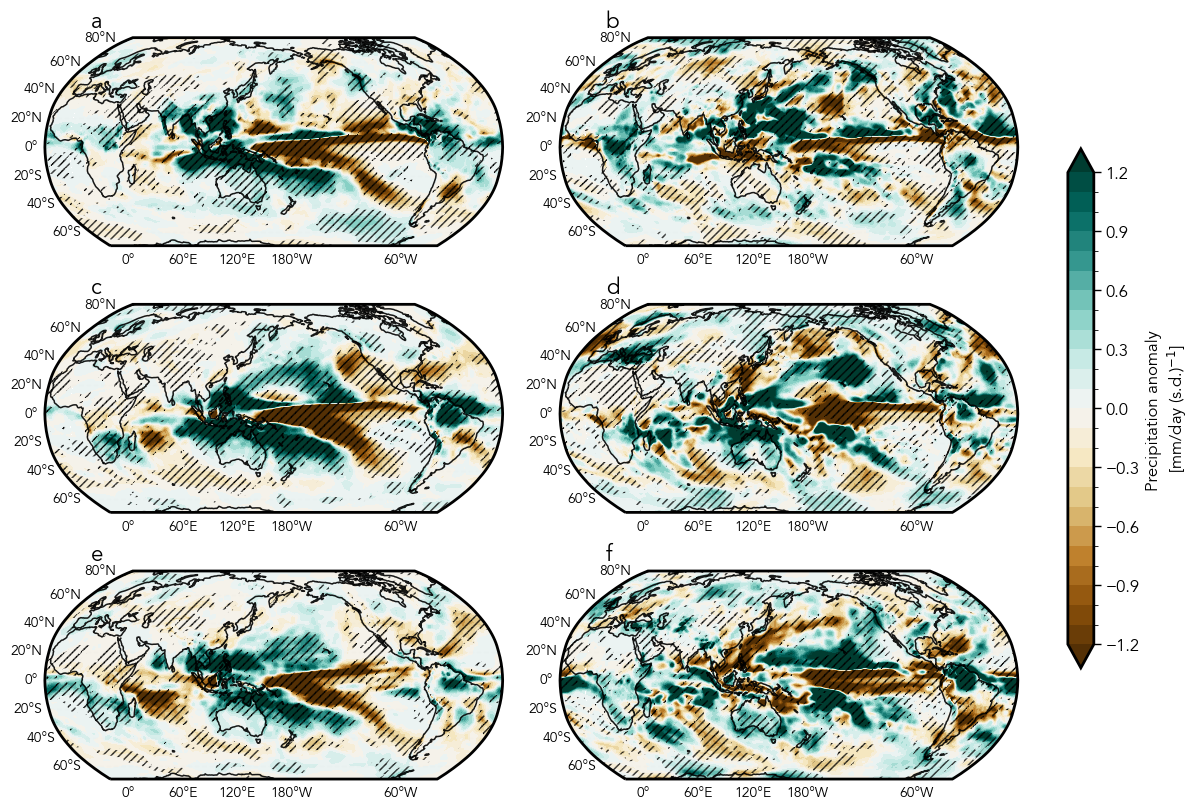

In [193]:
plot_maps(xx, yy, plot_list, title_list, label_list, cmap='BrBG', levels=np.arange(-1.2, 1.3, 0.1), cbar_label = 'Precipitation anomaly \n[mm/day (s.d.)$^{-1}$]', pval = pval_list, draw_winds=False, u_wnd=[], v_wnd=[], wind_scale=20, nrows=3, ncols=2, figsize=(12,8), land_mask_list = [], add_patch=False, cbar_orientation='vertical', hatch_type = 'insig', proj = ccrs.Robinson(central_longitude=160))

In [179]:
plot_list = [
    pres_cp_son.prmsl.mean('time').sel(lat = slice(-40, 40)), pres_ep_son.prmsl.mean('time').sel(lat = slice(-40, 40)),
    pres_cp_djf.prmsl.mean('time').sel(lat = slice(-40, 40)), pres_ep_djf.prmsl.mean('time').sel(lat = slice(-40, 40)),
    pres_cp_mam.prmsl.mean('time').sel(lat = slice(-40, 40)), pres_ep_mam.prmsl.mean('time').sel(lat = slice(-40, 40)),
]

In [180]:
uwnd_list = [
    uwnd_cp_son.uwnd.mean('time').sel(lat = slice(-40, 40)), uwnd_ep_son.uwnd.mean('time').sel(lat = slice(-40, 40)),
    uwnd_cp_djf.uwnd.mean('time').sel(lat = slice(-40, 40)), uwnd_ep_djf.uwnd.mean('time').sel(lat = slice(-40, 40)),
    uwnd_cp_mam.uwnd.mean('time').sel(lat = slice(-40, 40)), uwnd_ep_mam.uwnd.mean('time').sel(lat = slice(-40, 40)),
]

In [181]:
vwnd_list = [
    vwnd_cp_son.vwnd.mean('time').sel(lat = slice(-40, 40)), vwnd_ep_son.vwnd.mean('time').sel(lat = slice(-40, 40)),
    vwnd_cp_djf.vwnd.mean('time').sel(lat = slice(-40, 40)), vwnd_ep_djf.vwnd.mean('time').sel(lat = slice(-40, 40)),
    vwnd_cp_mam.vwnd.mean('time').sel(lat = slice(-40, 40)), vwnd_ep_mam.vwnd.mean('time').sel(lat = slice(-40, 40)),
]

In [182]:
# pval_list = [
#     bstrap_pres_cp_son.presate.sel(lat = slice(-80, 70)), bstrap_pres_cp_djf.presate.sel(lat = slice(-80, 70)), bstrap_pres_cp_mam.presate.sel(lat = slice(-80, 70)),
#     bstrap_pres_ep_son.presate.sel(lat = slice(-80, 70)), bstrap_pres_ep_djf.presate.sel(lat = slice(-80, 70)), bstrap_pres_ep_mam.presate.sel(lat = slice(-80, 70)),
# ]

In [183]:
title_list = [
    # 'CP SON', 'CP DJF', 'CP MAM',
    # 'EP SON', 'EP DJF', 'EP MAM'
    '', '', '',
    '', '', ''
]

In [184]:
label_list = [
    'a', 'b', 'c',
    'd', 'e', 'f'
]

In [185]:
xx, yy = np.meshgrid(pres_cp_son.sel(lat = slice(-40, 40)).lon, pres_cp_son.sel(lat = slice(-40, 40)).lat)

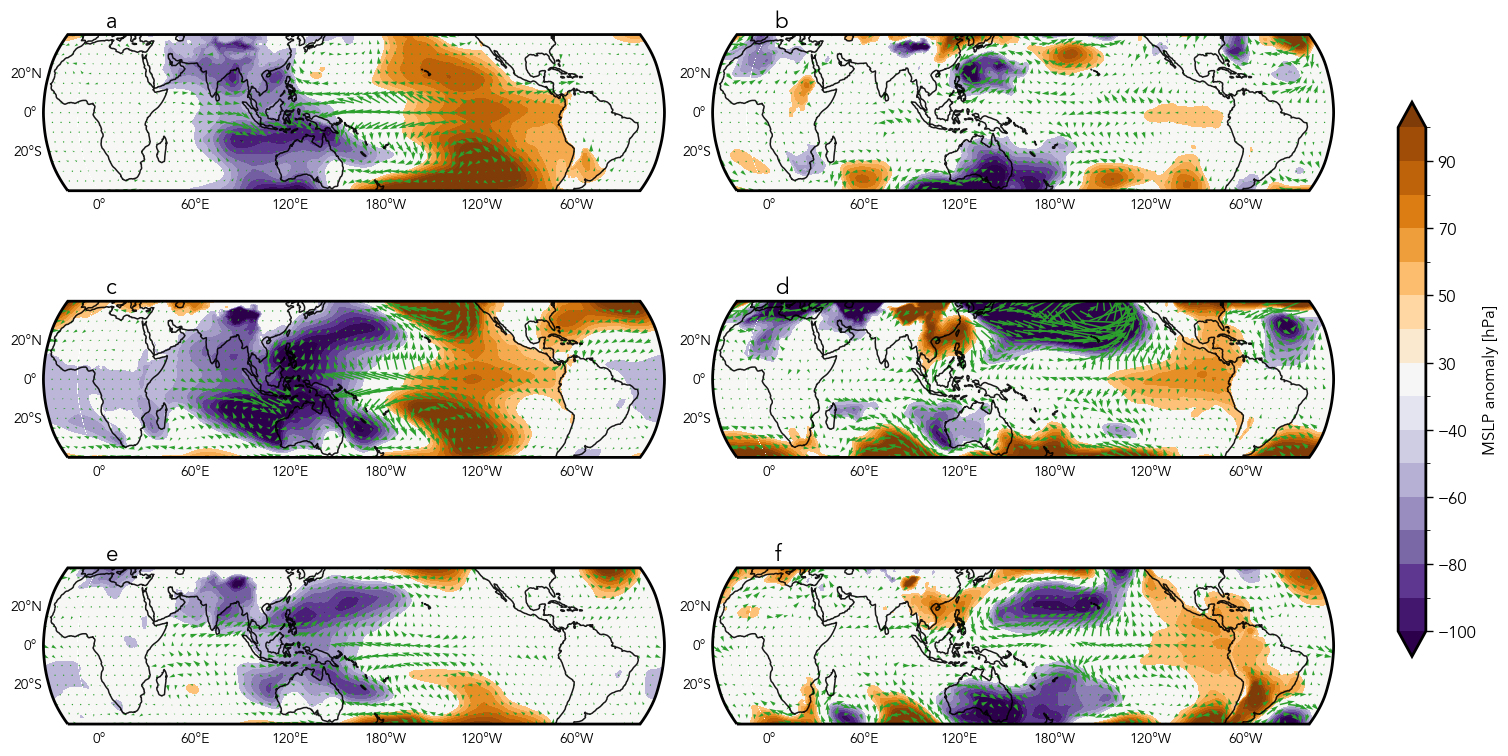

In [186]:
# plot_maps(xx, yy, plot_list, title_list, label_list, cmap='PuOr_r', levels=[-200, -180, -160, -140, -120, -100, -80, -60, -40, -20, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200], cbar_label = 'MSLP anomaly [hPa]', pval = [], draw_winds=True, u_wnd=uwnd_list, v_wnd=vwnd_list, wind_scale=55, nrows=2, ncols=3, figsize=(12,5), land_mask_list = [], add_patch=False, cbar_orientation='vertical', hatch_type = 'insig', proj = ccrs.Robinson(central_longitude=160))
plot_maps(xx, yy, plot_list, title_list, label_list, cmap='PuOr_r', levels=[-100, -90, -80, -70, -60, -50, -40, -30, 30, 40, 50, 60, 70, 80, 90, 100], cbar_label = 'MSLP anomaly [hPa]', pval = [], draw_winds=True, u_wnd=uwnd_list, v_wnd=vwnd_list, wind_scale=55, nrows=3, ncols=2, figsize=(15,8), land_mask_list = [], add_patch=False, cbar_orientation='vertical', hatch_type = 'insig', proj = ccrs.Robinson(central_longitude=160))

In [205]:
plot_list = [
    omega_cp_son.omega.mean('time'), omega_ep_son.omega.mean('time'),
    omega_cp_djf.omega.mean('time'), omega_ep_djf.omega.mean('time'),
    omega_cp_mam.omega.mean('time'), omega_ep_mam.omega.mean('time'),
]

In [206]:
pval_list = [
    bstrap_omega_cp_son.omega, bstrap_omega_ep_son.omega,
    bstrap_omega_cp_djf.omega, bstrap_omega_ep_djf.omega,
    bstrap_omega_cp_mam.omega, bstrap_omega_ep_mam.omega,
]

In [207]:
title_list = [
    # 'CP SON', 'CP DJF', 'CP MAM',
    # 'EP SON', 'EP DJF', 'EP MAM'
    '', '', '',
    '', '', ''
]

In [208]:
label_list = [
    'a', 'b', 'c',
    'd', 'e', 'f'
]

In [209]:
xx, yy = np.meshgrid(bstrap_omega_ep_son.lon, bstrap_omega_ep_son.level)

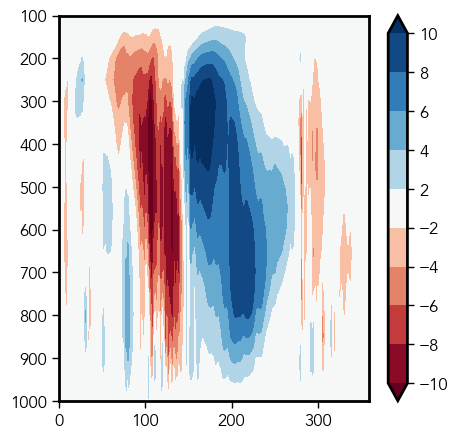

In [230]:
# ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
cf = ax.contourf(xx, yy, plot_list[0]*(10**3), cmap = 'RdBu', levels=[-10, -8, -6, -4, -2, 2, 4, 6, 8, 10], extend='both')
ax.invert_yaxis()
plt.colorbar(cf)

ValueError: Filled contours require at least 2 levels.

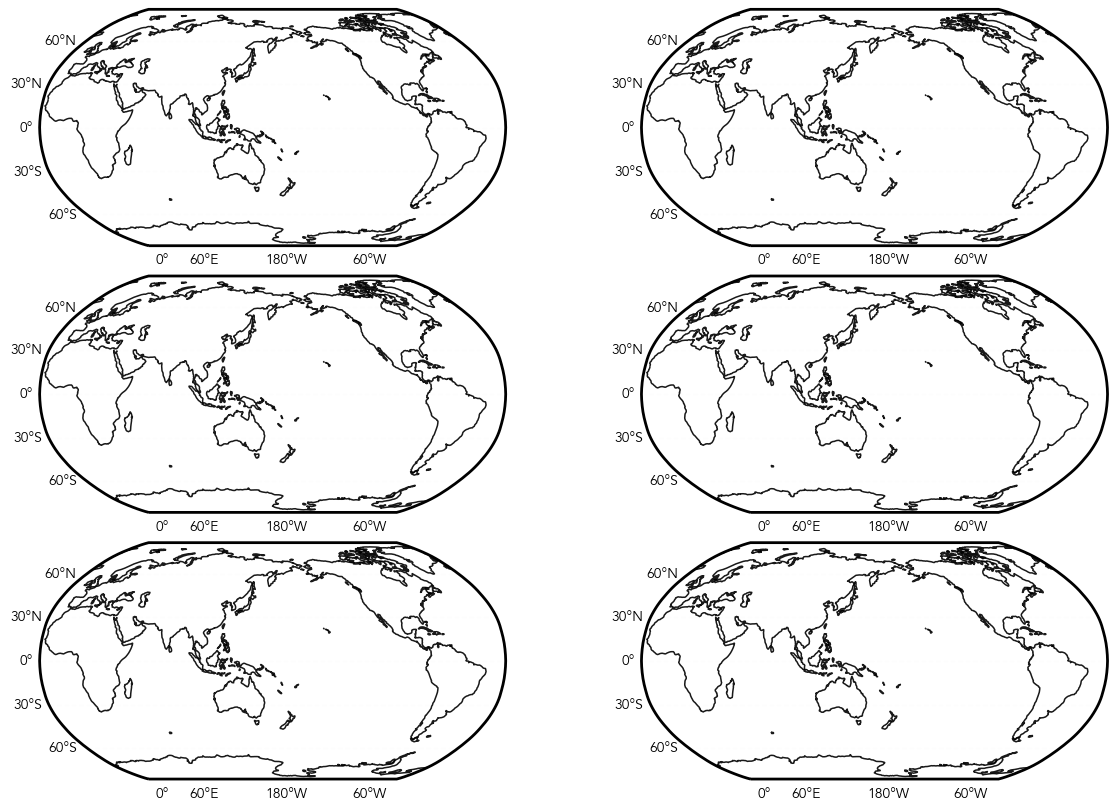

In [210]:
plot_maps(xx, yy, plot_list, title_list, label_list, cmap='RdBu_r', levels=np.arange(-0.0045, -0.0050, 0.0005), cbar_label = 'Vertical velocity anomaly [Pa/s]', pval = pval_list, draw_winds=False, u_wnd=[], v_wnd=[], wind_scale=20, nrows=3, ncols=2, figsize=(12,8), land_mask_list = [], add_patch=False, cbar_orientation='vertical', hatch_type = 'insig', proj = ccrs.Robinson(central_longitude=160))

In [ ]:
xr.open_dataset()